# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [88]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [89]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
display(hospital_read_df.head())

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [90]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

display(clean_hospital_read_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


/Users/michaelcuffaro/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


None

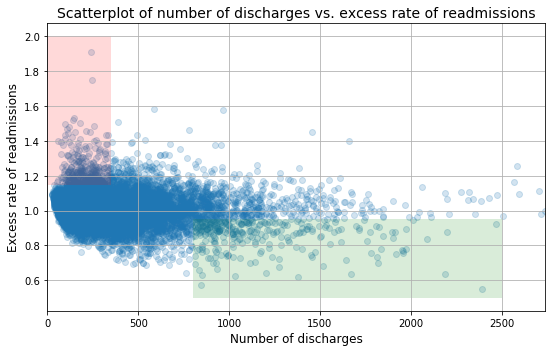

In [91]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [92]:
# Your turn

# Verification

### I) Verifying Initial observations based on the plot above

+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


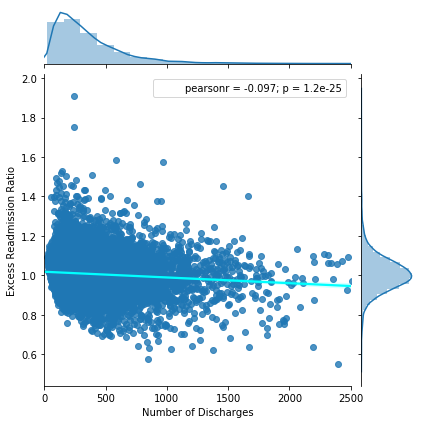

The slope of the regression line is: -2.90105173306e-05

The y-intercept of the regression line is: 1.01810614737


In [93]:
#Preliminary dataframe cleaning
# display(clean_hospital_read_df.head())

#dropping Footnote column
df = clean_hospital_read_df.drop("Footnote", axis=1)
# display(df.head())

#dropping all rows with Nans
df = df.dropna()
display(df.head())


#1) Verify Trend -- Overall, rate of readmissions is trending down with increasing number of discharges
import seaborn as sns

jp = sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data = df, kind='reg', joint_kws={'line_kws':{'color':'cyan'}})
plt.xlim((0, 2500))
plt.show()


#2) Calculating slope and y-intercept of line using least squares method

slope, intercept = np.polyfit(df["Number of Discharges"].values, df["Excess Readmission Ratio"].values, 1)

print("The slope of the regression line is:", slope)
print("\nThe y-intercept of the regression line is:", intercept)

# *Partially Agree that "Overall, rate of readmissions is trending down with increasing number of discharges"


# *Partially Agree that "With lower number of discharges, there is a greater incidence of excess rate of readmissions"
# *Partically Agree that "With higher number of discharges, there is a greater incidence of lower rates of readmissions" 

# *Note: just be aware that there is a very weak correlation between both varibles, so take this overall
# trend with a grain of salt.

### Verifying initial observations based on the plot above

+ *Partially Agree that "Overall, rate of readmissions is trending down with increasing number of discharges"
+ *Partially Agree that "With lower number of discharges, there is a greater incidence of excess rate of readmissions"
+ *Partially Agree that "With higher number of discharges, there is a greater incidence of lower rates of readmissions" 

*Note: just be aware that there is a very weak correlation between both variables, so take this overall
trend with a grain of salt.

### 2) Verifying Statistics

+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [94]:
#1) Checking mean excess readmission rate for when discharges<100

#a) Filtering dataframe so that get all discharges <100
df_fltr_discharge_less_100 = df[df["Number of Discharges"]<100] 

print("\nFiltered DataFrame with Discharges < 100")
display(df_fltr_discharge_less_100.head())

#b) Taking the mean of "excess readmission rate"
discharge_less_100_mean = df_fltr_discharge_less_100["Excess Readmission Ratio"].mean()
print("Discharges <100:\n")
print("The mean for the hospitals with discharges <100 is:", discharge_less_100_mean)

#c) Calculating % of excess readmisison rates>1
percent_readmin_greatr_1 = (df_fltr_discharge_less_100["Excess Readmission Ratio"]>1.0).sum()/len(df_fltr_discharge_less_100["Excess Readmission Ratio"])
print("The perecent of excess readmission rates >1 and hospitals with discharges<100 is:",percent_readmin_greatr_1 )

#2) Checking stats for hospitals with number of discharges >1000

#a) Filtering dataframe for all discharges > 1000
df_fltr_discharge_greater_1000 = df[df["Number of Discharges"]>1000]

print("\n\nFiltered DataFrame with Discharges > 1000")
display(df_fltr_discharge_greater_1000.head())

#b) Finding mean 'excess readmission ratio'
discharge_greater_1000_mean = df_fltr_discharge_greater_1000["Excess Readmission Ratio"].mean()
print("Discharges > 1000:\n")
print("The mean for the hospitals with discharges > 1000 is:", discharge_greater_1000_mean)

#c) Calculating % of excess readmission rates >1
percent_readmin_greatr_1_discharge_1000 = (df_fltr_discharge_greater_1000["Excess Readmission Ratio"]>1.0).sum()/len(df_fltr_discharge_greater_1000["Excess Readmission Ratio"])
print("The perecent of excess readmission rates >1 and hospitals with discharges > 1000 is:",percent_readmin_greatr_1_discharge_1000)



Filtered DataFrame with Discharges < 100


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


Discharges <100:

The mean for the hospitals with discharges <100 is: 1.0226183501683506
The perecent of excess readmission rates >1 and hospitals with discharges<100 is: 0.632154882155


Filtered DataFrame with Discharges > 1000


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
11757,FLETCHER ALLEN HOSPITAL OF VERMONT,470003,VT,READM-30-AMI-HRRP,1002,0.9192,14.0,15.2,136.0,07/01/2010,06/30/2013
821,CRITTENTON HOSPITAL MEDICAL CENTER,230254,MI,READM-30-HIP-KNEE-HRRP,1004,1.1405,6.1,5.4,64.0,07/01/2010,06/30/2013
2363,YUMA REGIONAL MEDICAL CENTER,30013,AZ,READM-30-PN-HRRP,1007,1.0760,18.5,17.2,191.0,07/01/2010,06/30/2013
7188,EVANSTON HOSPITAL,140010,IL,READM-30-COPD-HRRP,1007,0.9930,20.0,20.2,201.0,07/01/2010,06/30/2013
2341,KING'S DAUGHTERS' MEDICAL CENTER,180009,KY,READM-30-PN-HRRP,1008,1.0765,21.0,19.5,216.0,07/01/2010,06/30/2013


Discharges > 1000:

The mean for the hospitals with discharges > 1000 is: 0.9783354211663071
The perecent of excess readmission rates >1 and hospitals with discharges > 1000 is: 0.444924406048


All statistics have been verified and are correct:
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

### 3)  Verifying Conclusions

+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In [95]:
#1) Checking if there is actually a correlation between 'number of discharges' and 'readmission rates'

x_number_discharges = df["Number of Discharges"].values
# print(x_number_discharges)
y_readmission_rates = df["Excess Readmission Ratio"].values

#a) Correlation Matrix to test correlation between two variables

correlation = np.corrcoef(x_number_discharges, y_readmission_rates)
print(correlation)

[[ 1.         -0.09739794]
 [-0.09739794  1.        ]]


Proposed conclusion is suggesting a 'significant' correlation between number of discharges and readmission rates, when in fact the correlation matrix is showing otherwise. The ACTUAL conlusion is that there is a very weak correlation between number of discharges and readmission rates (correlation is -.097).

### 4) Verify Recomendations

+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

***
A. Do you agree with the above analysis and recommendations? Why or why not?

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Setup an appropriate hypothesis test.
Compute and report the observed significance value (or p-value).
Report statistical significance for  αα  = .01.
Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

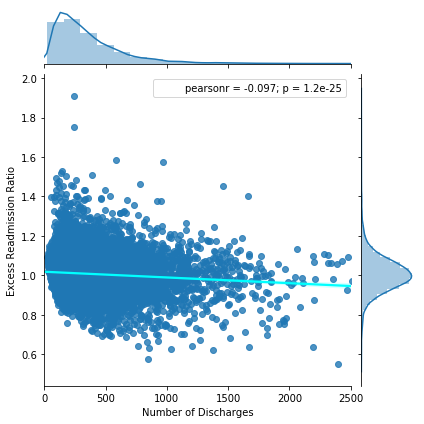

**Hypothesis Test**

**Null Hypothesis:** There is no significant correlation between number of discharges and excess readmission ratio

**Alternative Hypothesis:** There is siginificant correlation between number of discharges and excess readmission ratio

***
**Hypothesis Outcome:**

From the previously generated joint plot, as shown above, it can be seen that capacity and excess readmission ratio are in fact statistically significant with a P-value ~0 for a 99% confidence interval since (P-value< alpha=.01). As a result we are able to reject our null hypothesis and say with 99% confidence support our alternative hypotheis suggesting that there is a significant correlation between both variables. However, eventhough we have rejected our null hypothesis in favor of the alternative hypothesis, we can see that there is a very weak correlation between the number of discharges and excess readmission ratio variables. From a practical point of view, because there is a very weak correlation between capacity and excess readmission I would not advise the client to jump all over this recommendation and hold off until further evidence is gathered to support the suggested recommendation that  smaller capacity hospitals (< 300) should be required to upgrade resource allocation for quality care. 

**Plot Comparison**


After constructing the joint plot, above, and comparing with the scatter plot generated in the beginning of the report we can see that the joint plot allows us to clearly see the trend and correlation between the variables with a defined regression line and pearson r value. Just by using a scatter plot,it is difficult to discern this information as it appears that there is a strong negative correlation when in fact there is a very weak one present between the number of discharges and excess readmission ratio. 
 

